In [1]:
%load_ext autoreload
%autoreload 2

# Synthetic Data

## Generate

In [2]:
from faim.data_preparation.synthetic import NormalSyntheticGroupedDatasetBuilder
import numpy as np
from numpy.random import PCG64, Generator


random_generator = Generator(PCG64(4))
group_names=["privileged", "disadvantaged"]
synth_data_builder = NormalSyntheticGroupedDatasetBuilder(
    group_names=group_names,
    n_by_group=[50000, 50000],
    truth_prediction_means_by_group=[np.array([1, 2]), np.array([-1, -3]),],
    truth_prediction_correlation_matrixs_by_group=[
        np.array([[1, 0.8], [0.8, 1]]),
        np.array([[1, 0.8], [0.8, 1]]),
    ],
    random_generator=random_generator
)
synth_data = synth_data_builder.build()
synth_data.head()

/Users/aloosley/Repos/faim/faim/visualization/plots.py:25: SyntaxWarning: invalid escape sequence '\_'
  score_attr = score_attr.replace("_", "\_")
/Users/aloosley/Repos/faim/faim/visualization/plots.py:55: SyntaxWarning: invalid escape sequence '\_'
  scoresPerGroup.columns += "\_true"
/Users/aloosley/Repos/faim/faim/visualization/plots.py:59: SyntaxWarning: invalid escape sequence '\_'
  scoresPerGroup.columns += "\_pred"


,uuid,group,true_score,pred_score,true_label,pred_label
37946,278954279570070326047816648866999580548,0,0.897985,1.856003,1,1
4589,12426647787777188841294255796471230810,1,-0.221229,-2.008019,0,0
3166,255387844687498228556447326558023392914,0,2.361094,3.257432,1,1
17204,86369374653234291633780266013662205567,1,-0.124138,-2.095224,0,0
46899,118363859448353247887458884904892569887,1,-1.730384,-3.377135,0,0


## Figure 1

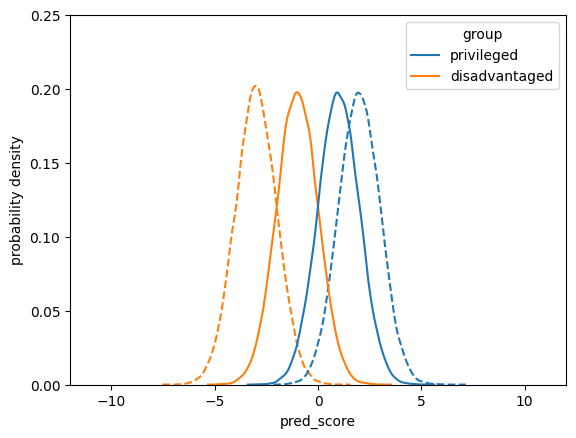

In [3]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("tab10")

plot_data = deepcopy(synth_data)
plot_data["group"] = plot_data.group.map(lambda idx: group_names[idx])

fig, ax = plt.subplots()
sns.kdeplot(data=plot_data, x="pred_score", hue="group", linestyle="--", ax=ax)
sns.kdeplot(data=plot_data, x="true_score", hue="group", linestyle="-", ax=ax)
_ = ax.set_ylabel("probability density")
_ = ax.set_xlim([-12, 12])
_ = ax.set_ylim([0, 0.25])

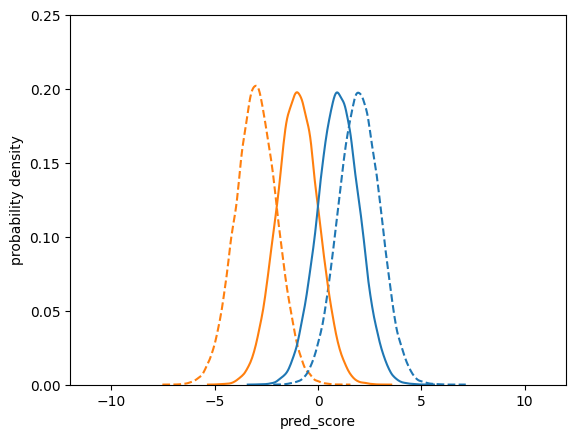

In [4]:
ax.get_legend().remove()
fig

In [5]:
fig.savefig("figures/figure1.svg", format="svg")

## Figure 2

In [6]:
synth_data

,uuid,group,true_score,pred_score,true_label,pred_label
37946,278954279570070326047816648866999580548,0,0.897985,1.856003,1,1
4589,12426647787777188841294255796471230810,1,-0.221229,-2.008019,0,0
3166,255387844687498228556447326558023392914,0,2.361094,3.257432,1,1
17204,86369374653234291633780266013662205567,1,-0.124138,-2.095224,0,0
46899,118363859448353247887458884904892569887,1,-1.730384,-3.377135,0,0
...,...,...,...,...,...,...
7930,234699062927460372475734066390266063587,1,-1.212780,-2.572315,0,0
7509,15089153505416704292512233127742712425,1,-1.531099,-2.926980,0,0
37039,261563943644355159930423019258391980269,1,-0.558287,-1.985790,0,0
2260,33147730325608320422624079998762052933,0,0.549074,0.871799,1,1


# Synth From Paper

## Get Fair Scores

In [7]:
import pandas as pd
import numpy as np
from pathlib import Path

# Load paper data (remove truncated data - it's calculated later anyways)
synth_data_from_paper_filepath = Path("../prepared-data/synthetic/2groups/2022-01-12/dataset.csv")
data = pd.read_csv(synth_data_from_paper_filepath)

group_names = {0: "advantaged", 1: "disadvantaged"}
pred_score_column = "pred_score"
score_stepsize = 0.1
thetas = {0: np.array([1, 0, 0]), 1: np.array([1, 0, 0])}
optimal_transport_regularization = 0.001
result_dir = Path("../results/synthetic/2groups/2022-01-12-notebook/")
result_dir.mkdir(exist_ok=True, parents=True)

In [15]:
from faim.algorithm.faim import FairInterpolationMethod

fair_interpolation_method = FairInterpolationMethod(
    rawData=data,
    group_names=group_names,
    pred_score_column=pred_score_column,
    score_stepsize=score_stepsize,
    thetas=thetas,
    regForOT=optimal_transport_regularization,
    path=result_dir,
    plot=False,
)
results = fair_interpolation_method.run()

    1|9.254060e-01|
   11|2.867910e-01|
   21|5.811975e-02|
   31|1.135057e-02|
   41|2.212253e-03|
   51|4.307819e-04|
Sum of barycenter between groups for condition groundTruthLabel=0: 0.999999997079619
    1|9.284266e-01|
   11|3.135971e-01|
   21|6.653845e-02|
   31|1.354469e-02|
   41|2.739430e-03|
   51|5.534922e-04|
   61|1.118069e-04|
Sum of barycenter between groups for condition groundTruthLabel=1: 0.9999999997886343


/Users/aloosley/Repos/faim/faim/util/util.py:43: RuntimeWarning: divide by zero encountered in reciprocal
  inverse_norm_vec = np.reciprocal(norm_vec)
/Users/aloosley/Repos/faim/faim/util/util.py:43: RuntimeWarning: divide by zero encountered in reciprocal
  inverse_norm_vec = np.reciprocal(norm_vec)
/Users/aloosley/Repos/faim/faim/algorithm/faim.py:257: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, fairScore in fairScores.iteritems():
/Users/aloosley/Repos/faim/faim/algorithm/faim.py:264: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  raw = raw.groupby(["group"], as_index=Fa

    1|7.820441e-01|
   11|4.357995e-01|
   21|2.263641e-01|
   31|1.348808e-01|
   41|8.899632e-02|
   51|6.472798e-02|
   61|5.283056e-02|
   71|4.632999e-02|
   81|4.219433e-02|
   91|3.917434e-02|
  101|3.669457e-02|
  111|3.448174e-02|
  121|3.241191e-02|
  131|3.043527e-02|
  141|2.853694e-02|
  151|2.671674e-02|
  161|2.497914e-02|
  171|2.332865e-02|
  181|2.176806e-02|
  191|2.029803e-02|
  201|1.891742e-02|
  211|1.762396e-02|
  221|1.641425e-02|
  231|1.528426e-02|
  241|1.422984e-02|
  251|1.324697e-02|
  261|1.233152e-02|
  271|1.147900e-02|
  281|1.068534e-02|
  291|9.946661e-03|
  301|9.259277e-03|
  311|8.619700e-03|
  321|8.024637e-03|
  331|7.470998e-03|
  341|6.955976e-03|
  351|6.476868e-03|
  361|6.031030e-03|
  371|5.616122e-03|
  381|5.229966e-03|
  391|4.870541e-03|
  401|4.535970e-03|
  411|4.224509e-03|
  421|3.934541e-03|
  431|3.664563e-03|
  441|3.413182e-03|
  451|3.179103e-03|
  461|2.961124e-03|
  471|2.758127e-03|
  481|2.569076e-03|
  491|2.393006e-03|


/Users/aloosley/Repos/faim/faim/util/util.py:43: RuntimeWarning: divide by zero encountered in reciprocal
  inverse_norm_vec = np.reciprocal(norm_vec)
/Users/aloosley/Repos/faim/faim/util/util.py:43: RuntimeWarning: divide by zero encountered in reciprocal
  inverse_norm_vec = np.reciprocal(norm_vec)
/Users/aloosley/Repos/faim/faim/algorithm/faim.py:257: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, fairScore in fairScores.iteritems():
/Users/aloosley/Repos/faim/faim/algorithm/faim.py:257: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, fairScore in fairScores.iteritems():
/Users/aloosley/Repos/faim/faim/algorithm/faim.py:264: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve 

## Boundary

<Axes: xlabel='pred_score_truncated'>

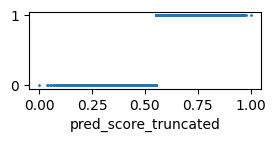

In [16]:
results.plot(x="pred_score_truncated", y="predictedLabel", style='.', markersize=2, figsize=(3, 1), legend=False)

In [20]:
def find_boundary(results) -> float:
    return (
        results[results.predictedLabel==0].pred_score_truncated.max()
        + results[results.predictedLabel==1].pred_score_truncated.min()
    ) / 2
    

In [21]:
find_boundary(results)

0.5507246376811594

## Results Plots - Calibration Condition

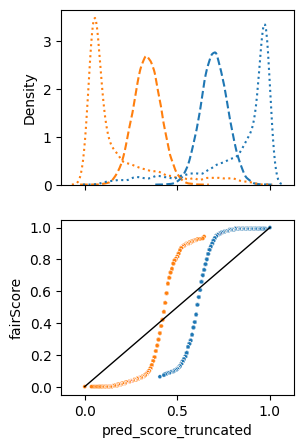

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("tab10")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(3, 5))

sns.kdeplot(data=results, x="pred_score_truncated", hue="group", linestyle="--", ax=ax1)
sns.kdeplot(data=results, x="fairScore", hue="group", linestyle=":", ax=ax1)

sns.scatterplot(data=results, x="pred_score_truncated", y="fairScore", hue="group", s=8, ax=ax2)
plt.plot([0, 1], [0, 1], 'k-', linewidth=1)

for ax in (ax1, ax2):
    ax.get_legend().remove()

## All Conditions

    1|9.254060e-01|
   11|2.867910e-01|
   21|5.811975e-02|
   31|1.135057e-02|
   41|2.212253e-03|
   51|4.307819e-04|
Sum of barycenter between groups for condition groundTruthLabel=0: 0.999999997079619
    1|9.284266e-01|
   11|3.135971e-01|
   21|6.653845e-02|
   31|1.354469e-02|
   41|2.739430e-03|
   51|5.534922e-04|
   61|1.118069e-04|
Sum of barycenter between groups for condition groundTruthLabel=1: 0.9999999997886343


/Users/aloosley/Repos/faim/faim/util/util.py:43: RuntimeWarning: divide by zero encountered in reciprocal
  inverse_norm_vec = np.reciprocal(norm_vec)
/Users/aloosley/Repos/faim/faim/util/util.py:43: RuntimeWarning: divide by zero encountered in reciprocal
  inverse_norm_vec = np.reciprocal(norm_vec)
/Users/aloosley/Repos/faim/faim/algorithm/faim.py:257: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, fairScore in fairScores.iteritems():
/Users/aloosley/Repos/faim/faim/algorithm/faim.py:264: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  raw = raw.groupby(["group"], as_index=Fa

FileNotFoundError: [Errno 2] No such file or directory: '/Users/aloosley/Repos/faim/results/synthetic/2groups/2022-01-12-notebook/1,0,0,1,0,0/muAmuBmuC_group=0.png'

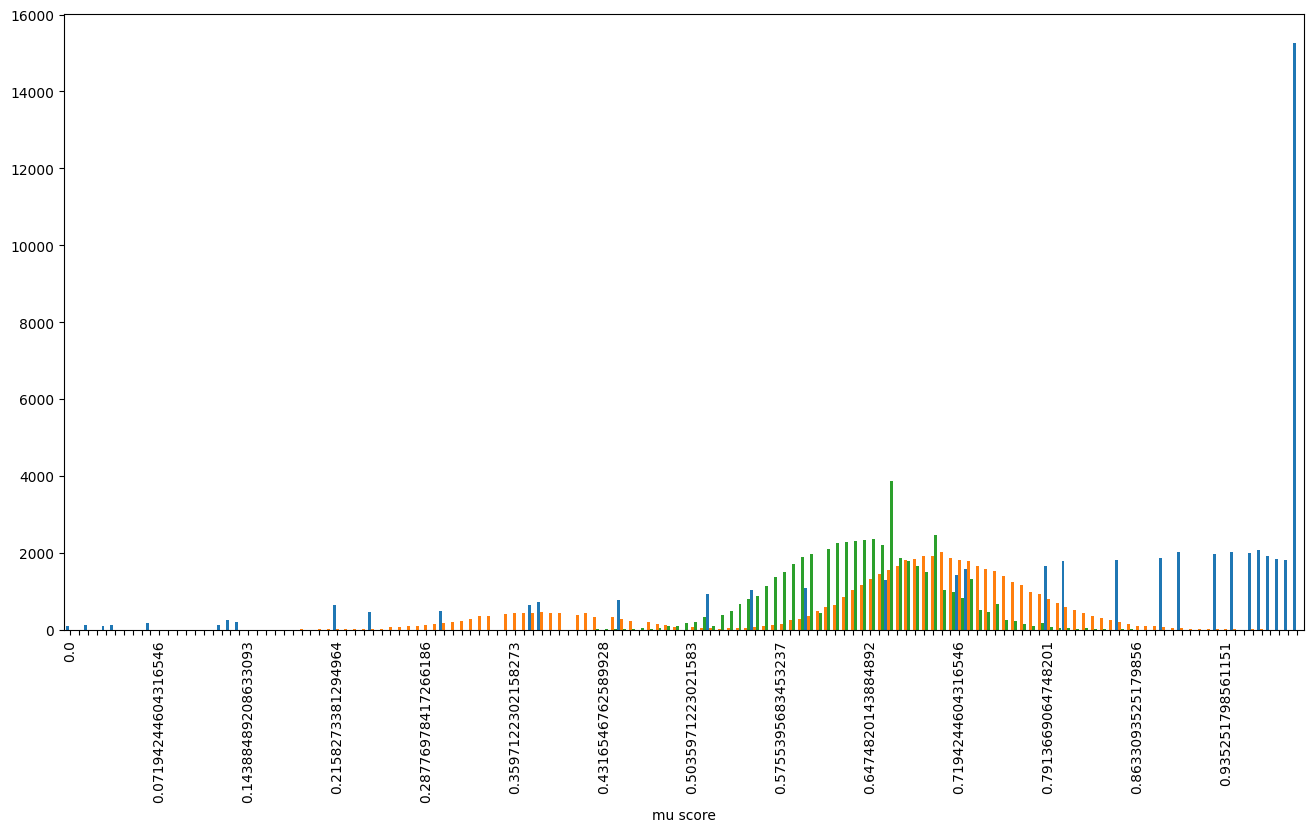

In [25]:
thetas_by_condition = [
    {0: np.array([1, 0, 0]), 1: np.array([1, 0, 0])},
    {0: np.array([0, 1, 0]), 1: np.array([0, 1, 0])},
    {0: np.array([0, 0, 1]), 1: np.array([0, 0, 1])},
    {0: np.array([1, 1, 1]), 1: np.array([1, 1, 1])},
]
result_dir_by_condition = [
    Path("../results/synthetic/2groups/2022-01-12-notebook/1,0,0,1,0,0/"),
    Path("../results/synthetic/2groups/2022-01-12-notebook/0,1,0,0,1,0/"),
    Path("../results/synthetic/2groups/2022-01-12-notebook/0,0,1,0,0,1/"),
    Path("../results/synthetic/2groups/2022-01-12-notebook/1,1,1,1,1,1/"),
]

results_by_condition = []
for thetas, result_dir in zip(theta_by_condition, result_dir_by_condition):
    fair_interpolation_method = FairInterpolationMethod(
        rawData=data,
        group_names=group_names,
        pred_score_column=pred_score_column,
        score_stepsize=score_stepsize,
        thetas=thetas,
        regForOT=optimal_transport_regularization,
        path=result_dir,
        plot=False,
    )
    results_by_condition.append(fair_interpolation_method.run())